# Detection of Functional Interaction Structure

This Notebook exemplifies the methodology to detect the functional interaction structure of software development teams as explained in the paper:
```
Title:   Detecting the Functional Interaction Structure of Software Development Teams
Authors: Christian Zingg, Alexander von Gernler, Carsten Arzig, Frank Schweitzer, Christoph Gote
```

Notice that Figures 2, 3, and 5 in the paper were rendered in TikZ and not R, and therefore there are visual differences to this Jupyter Notebook.

## Initialization

In [1]:
library(igraph)
library(magrittr)
library(potentiality)

source("libs/organigraph.r")


# Tools and Settings
role_colors <- c("Developer" = "red", "Stakeholder" = "blue", "Product-Owner" = "green")
plot_helper <- function(role_network) {
    plot_role_network(role_network, role_colors = role_colors, node_sizes_range_to = 20,
                      show_weights = TRUE, margin = rep(0.2, 4))
}


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: parallel


Attaching package: ‘purrr’


The following object is masked from ‘package:magrittr’:

    set_names


The following objects are masked from ‘package:igraph’:

    compose, simplify



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard



Attaching package: ‘tibble’


The following object is masked from ‘package:assertthat’:

    has_name


The following object is masked from ‘package:igraph’:

    as_data_frame



Attaching package: ‘tidygraph’


The following object is masked from ‘package:igraph’:

    groups


The following object is masked from ‘package:stats’:

    filter




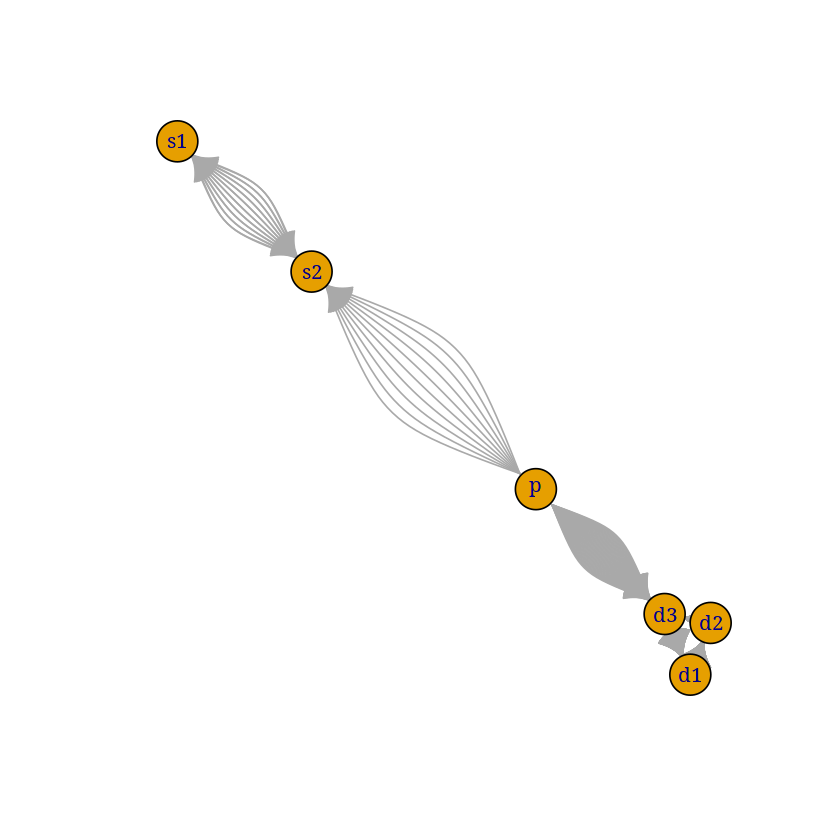

In [2]:
# Initializing network from Figure 3 (a)
example_network <- make_empty_graph(0) +
    vertices(name = c("d1", "d2", "d3", "s1", "s2", "p"),
             role = c(rep("Developer", 3), rep("Stakeholder", 2), "Product-Owner")) +
    edges(rep(c("d1", "d2"), 500),
          rep(c("d2", "d3"), 500),
          rep(c("d3", "d1"), 500),
          rep(c("s1", "s2"), 10),
          rep(c("s2", "s1"), 10),
          rep(c("p",  "d3"), 50),
          rep(c("p",  "s2"), 10))
plot(example_network)

## Replicate Figure 2

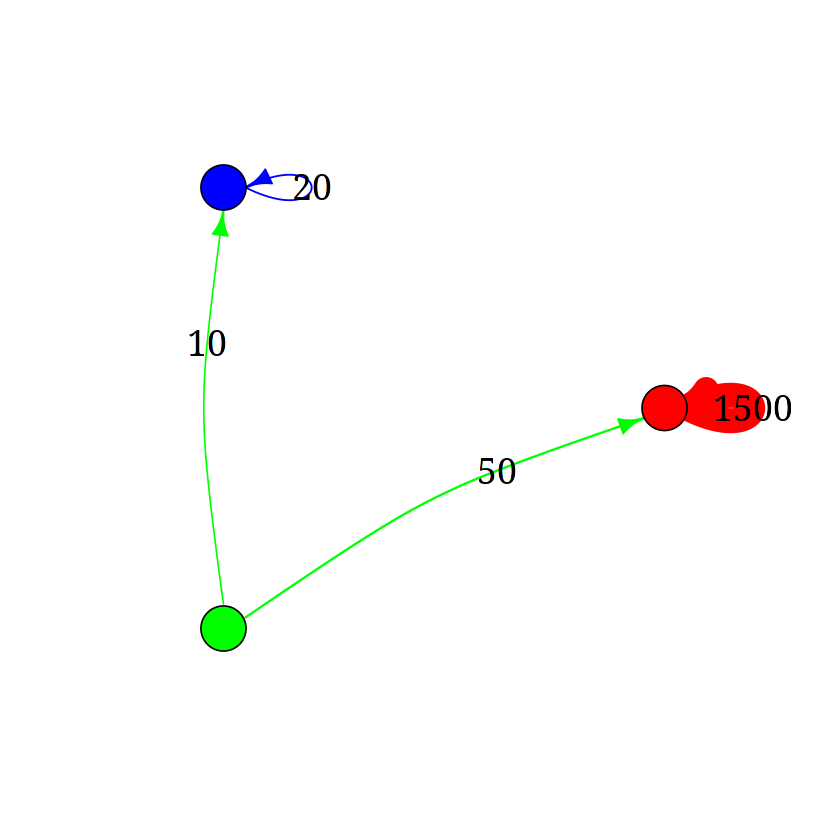

In [3]:
plot_helper(role_network_counts(example_network))

## Replicate Figure 3(b)

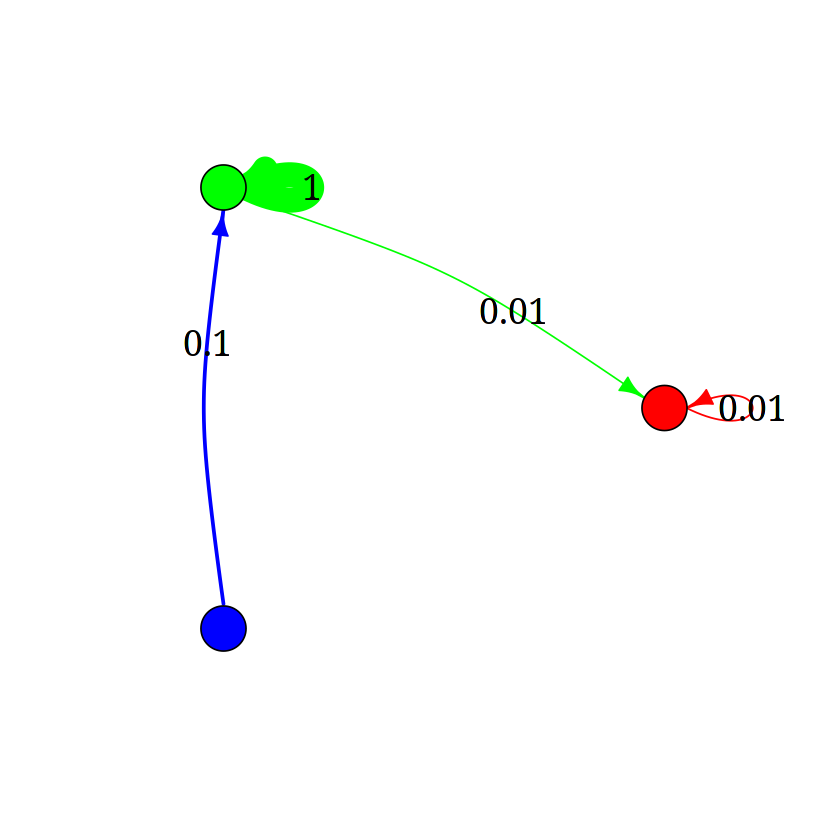

In [4]:
ens <- role_ensemble(example_network)

plot_helper(role_network_bccm(ens))
# TODO: DOUBLE-CHECK VALUES

## Replicate Figure 3(c)

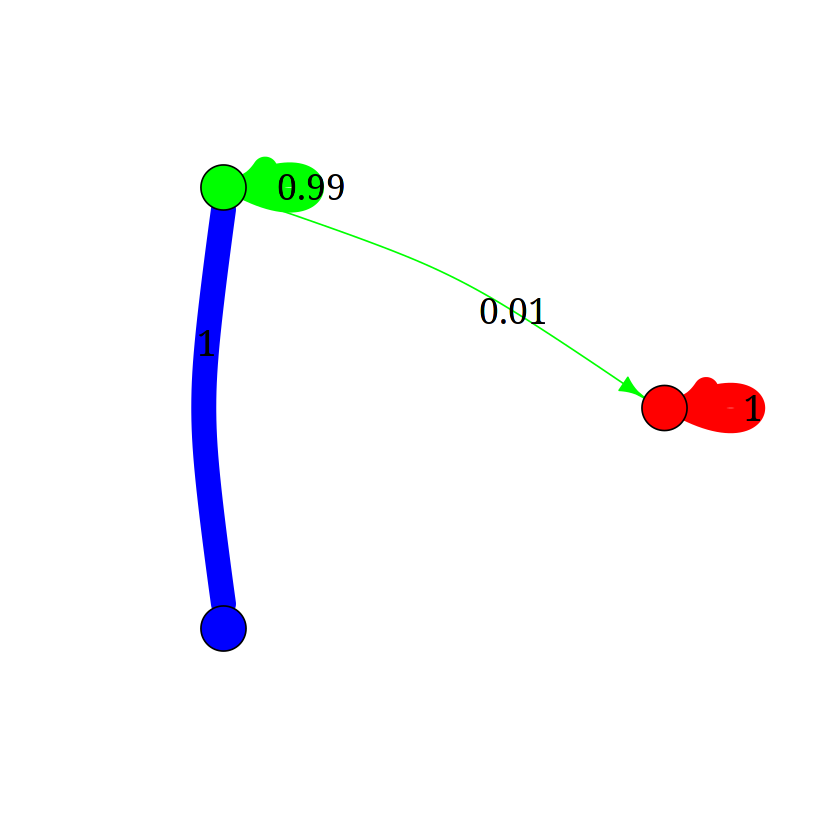

In [5]:
plot_helper(role_network_bccm_norm(ens))
# TODO: DOUBLE-CHECK VALUES

## Replicate Figure 5(b)

Different from the paper, this Jupyter Notebook uses the synthetic data from above because the data from _genua GmbH_ is confidential and cannot be released.

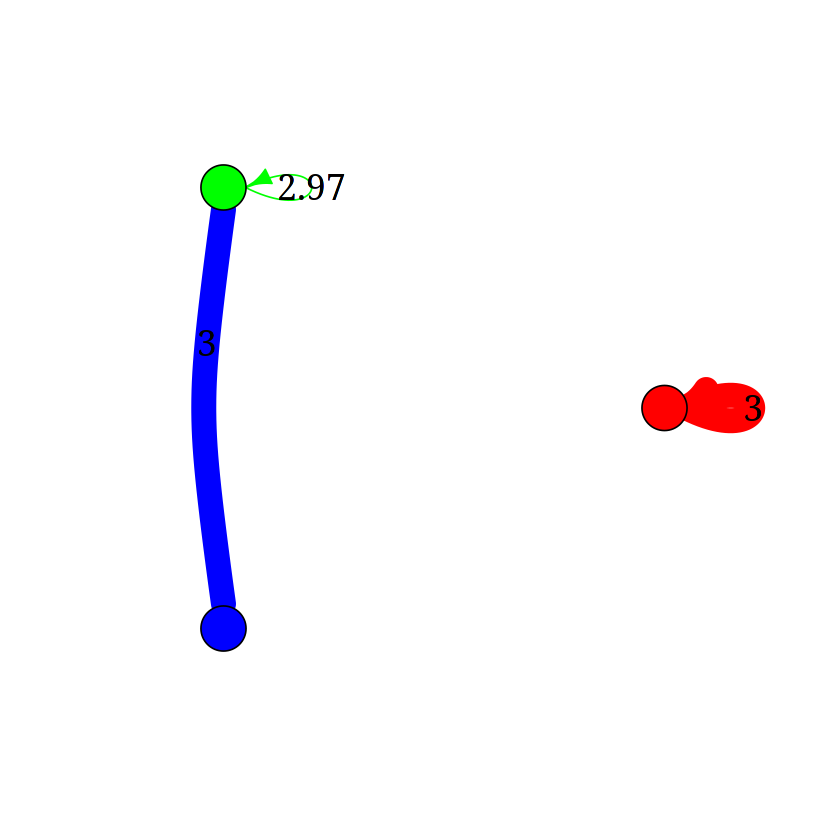

In [6]:
# Positive Preferences

plot_helper(role_network_bccm_norm(ens, "positive"))
# TODO: DOUBLE-CHECK VALUES

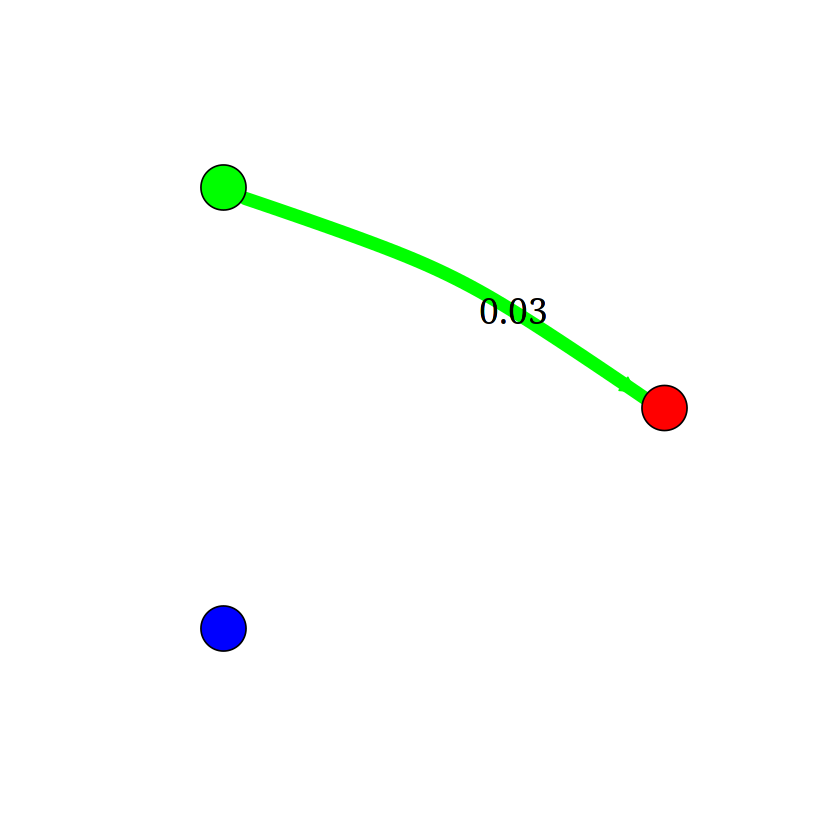

In [7]:
# Negative Preferences

plot_helper(role_network_bccm_norm(ens, "negative"))
# TODO: DOUBLE-CHECK VALUES

## Replicate Figure 7

We show the computation of the observed interactions (`obsInt`) and the two benchmark scenarios `ecdeDevs` and `ecdeAll` explained in the paper.
Different from the paper, this Jupyter Notebook uses the synthetic data from above because the data from _genua GmbH_ is confidential and cannot be released.

Notice that the `Developer` role in `example_network` has a strong preference to interact with members of the same role but nobody else.
In scenario `ecdeDevs`, this tendency will be broken up, resulting in a higher potentiality than `obsInt`.
In scenario `ecdeAll`, the tendencies will be broken up for all roles, especially also for the `Stakeholders` who interact preferentially among themselves too.
This will result in an even higher potentiality in the scenario `ecdeAll` than in `ecdeDevs`.
In total, we expect the following ordering:
$$\text{Potentiality}(\text{obsInt}) \leq \text{Potentiality}(\text{ecdeDevs}) \leq \text{Potentiality}(\text{ecdeAll})$$

In [8]:
# Fit ensemble for ecdeDevs

replace_roles_devonly <- function(network) {
    # Every nodes gets its own role except Developers.
    new_roles <- ifelse(V(network)$role == "Developer",
                        "Developer",
                        paste0("meta_", V(network)$name))
    V(network)$role <- new_roles
    return(network)
}

ens_devonly <- role_ensemble(replace_roles_devonly(example_network))

In [9]:
# Compute benchmark values

cat("obsInt:   ", potentiality(example_network), "\n")
cat("ecdeDevs: ", quantile(benchmark_scenario(ens_devonly, potentiality), c(0.025, 0.975)), "\n")
cat("ecdeAll:  ", quantile(benchmark_scenario(ens, potentiality), c(0.025, 0.975)))
# TODO: DOUBLE-CHECK VALUES

obsInt:    0.2019469 
ecdeDevs:  0.3643918 0.3783605 
ecdeAll:   0.3704261 0.398198